In [1]:
#Load important LIB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas_profiling

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

C:\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    

In [2]:
#Read the train and test file
train = pd.read_excel("Data_Train.xlsx", parse_dates=[1,7])
test = pd.read_excel("Test_set.xlsx", parse_dates=[1])

In [3]:
#Remove the repeating columns
#Replace New Delhi with Delhi
train.drop_duplicates(keep=False,inplace=True)
train['Destination'].value_counts()
cleanup = {'New Delhi':'Delhi'}
train['Source'] = train['Source'].replace(cleanup,regex=True)
train['Destination'] = train['Destination'].replace(cleanup,regex=True)
train['Destination'].value_counts()
train['Source'].value_counts()

Delhi       4179
Kolkata     2850
Banglore    2161
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [5]:
#This will show top 10 flight root
train['Route'].value_counts()[:10]

DEL → BOM → COK    2376
BLR → DEL          1520
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
CCU → DEL → BLR     565
BLR → BOM → DEL     402
MAA → CCU           381
DEL → HYD → COK     326
DEL → BLR → COK     232
Name: Route, dtype: int64

Flight price for Bangalore Delhi , we can see huge hike during the new year period and during the initial period of june . Else everywhere , we can see the constant trend of price between the two destinations.

In [29]:
#now filter the dataset by root
def route_price_plot(route):
    flight_route = train['Route'] == route
    flight_route = train[flight_route]
    flight_route.head()
    flight_route.sort_values(by='Date_of_Journey',ascending=True,inplace=True)
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    h1 = sns.pointplot(x=flight_route['Date_of_Journey'],y=flight_route['Price'],data=flight_route)

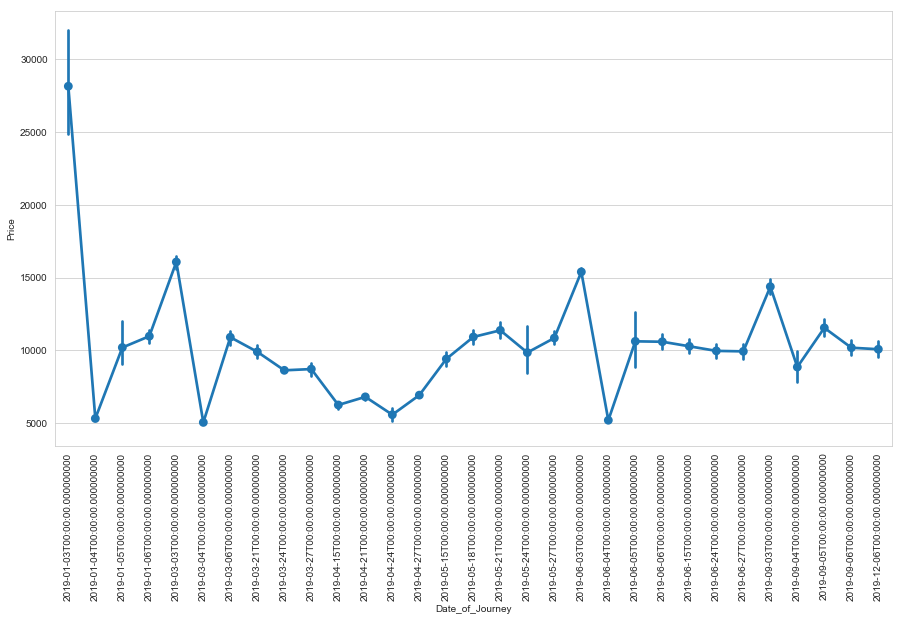

In [31]:
route_price_plot('DEL → BOM → COK')

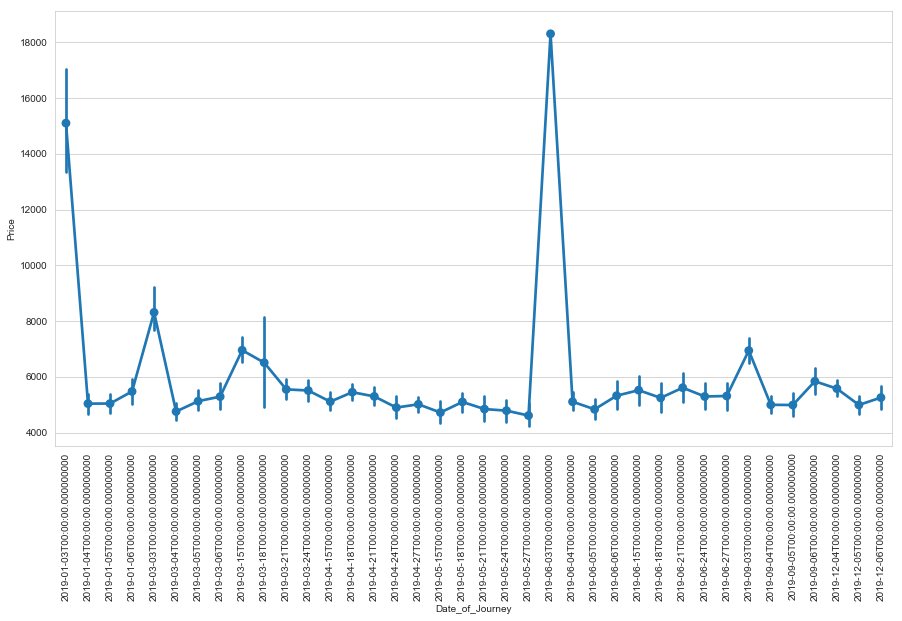

In [32]:
route_price_plot('BLR → DEL')

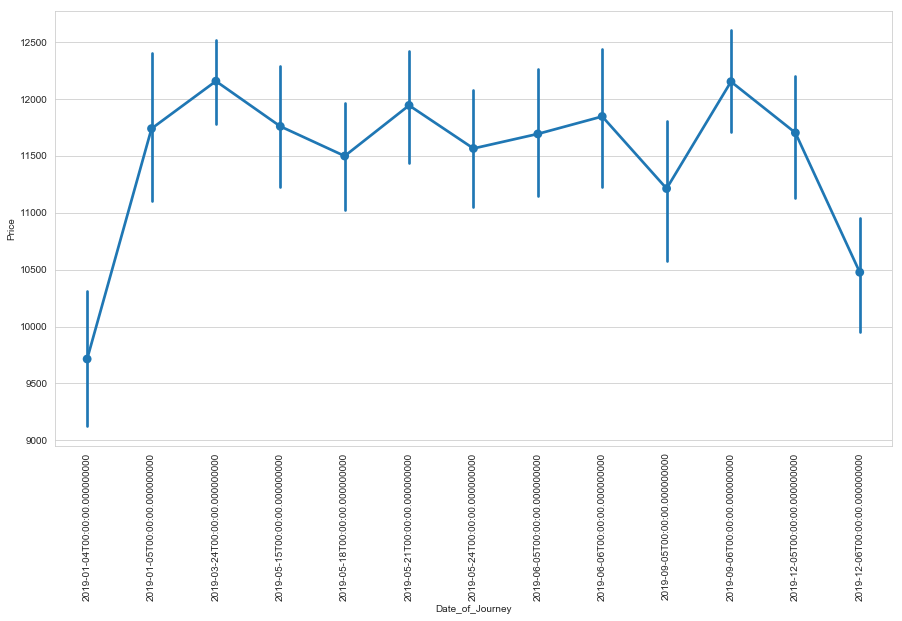

In [33]:
route_price_plot('CCU → BOM → BLR')

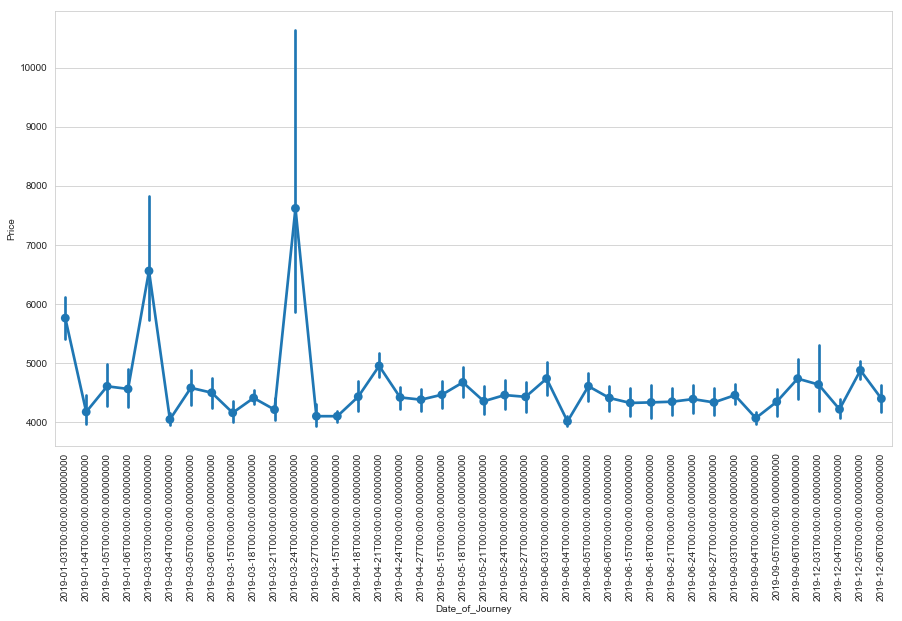

In [34]:
route_price_plot('CCU → BLR')

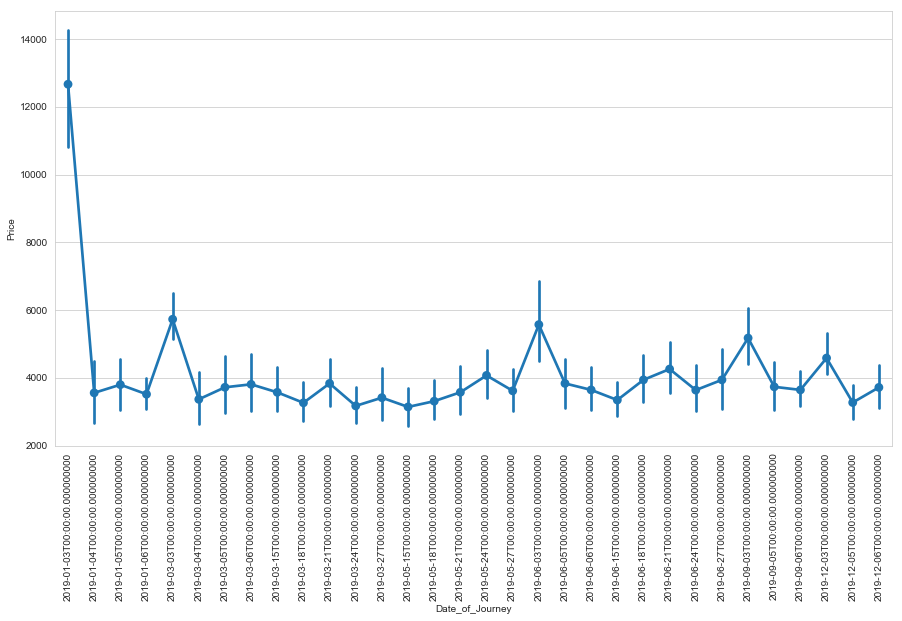

In [35]:
route_price_plot('BOM → HYD')

In [23]:
Delhi_flight.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3845,Air India,2019-12-06,Delhi,Cochin,DEL → BOM → COK,13:00,19:15,6h 15m,1 stop,No info,8372
1941,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,22:50,12:35 13 Jun,13h 45m,1 stop,In-flight meal not included,10262
2505,Air India,2019-12-06,Delhi,Cochin,DEL → BOM → COK,21:00,07:40 13 Jun,10h 40m,1 stop,No info,8372
7674,Multiple carriers,2019-12-06,Delhi,Cochin,DEL → BOM → COK,07:00,21:00,14h,1 stop,No info,7408
2323,IndiGo,2019-12-06,Delhi,Cochin,DEL → BOM → COK,17:30,01:30 13 Jun,8h,1 stop,No info,6104


In [36]:
def total_stops_price_plot(route):
    flight_route = train['Total_Stops'] == route
    flight_route = train[flight_route]
    flight_route.head()
    flight_route.sort_values(by='Date_of_Journey',ascending=True,inplace=True)
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    h1 = sns.pointplot(x=flight_route['Date_of_Journey'],y=flight_route['Price'],data=flight_route)

In [41]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3459
2 stops     1141
3 stops       41
4 stops        1
Name: Total_Stops, dtype: int64

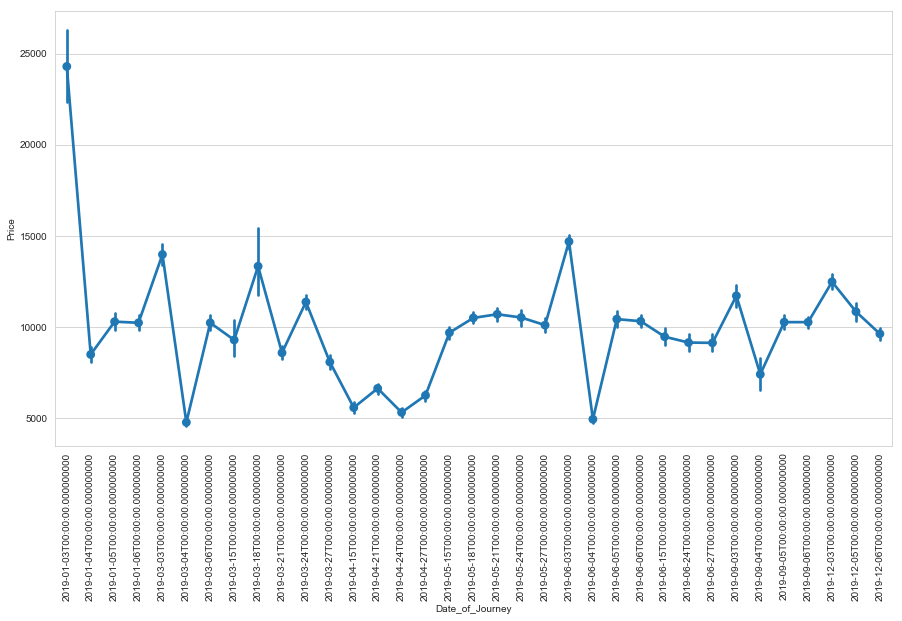

In [47]:
total_stops_price_plot('1 stop')

# price vs 2 stops

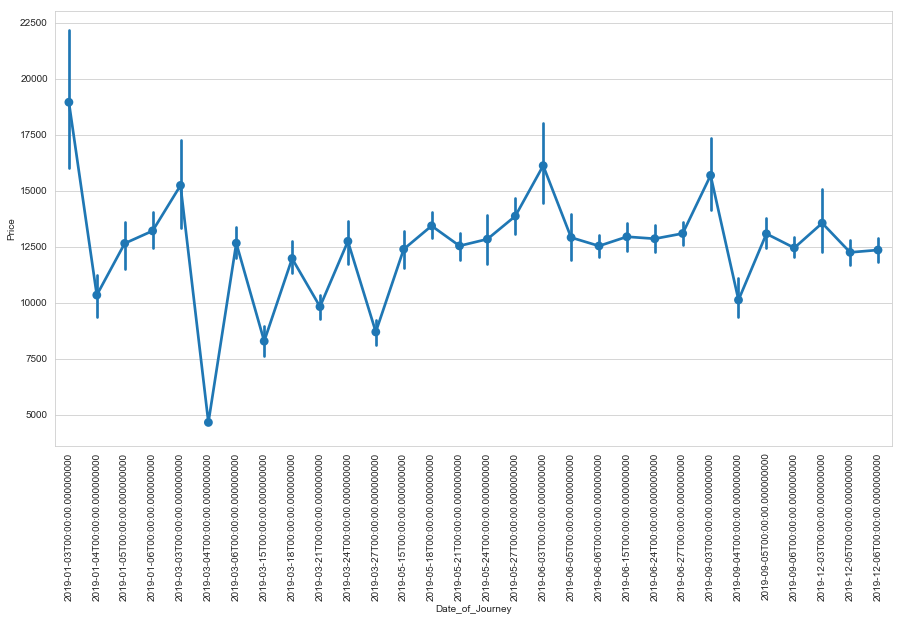

In [48]:
total_stops_price_plot('2 stops')

# price vs non stop

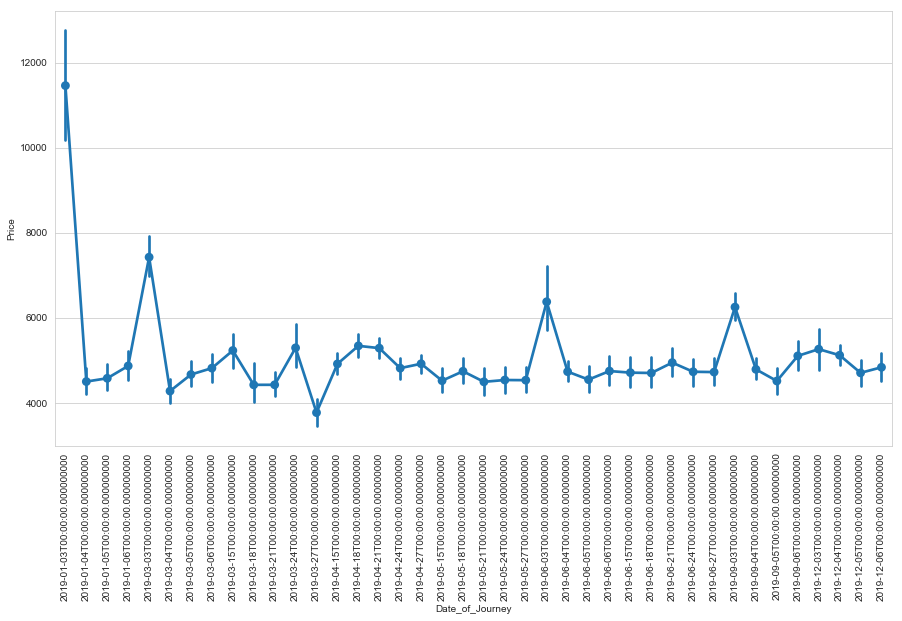

In [49]:
total_stops_price_plot('non-stop')

#Convert duration into meaning full sense 

In [58]:
train['hour'] = train['Duration'].split()

AttributeError: 'Series' object has no attribute 'split'